In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, accuracy_score ,mean_squared_error
from collections import Counter
import re
import nltk

import pymorphy2

#import gensim

In [2]:

data=pd.read_csv("irt.csv")


In [3]:
data

Unnamed: 0                                  lemmatized_review  type
0                0  это мой мнение и я без разница сколько быть ми...     1
1                1  вполне неплохой шоу , выгодно отличаться от бо...     1
2                2  уж кто-кто , а российский специалист 'умеют ' ...     0
3                4  есть такой категория фильм , который построить...     1
4                5  из весь фильм про зомби просмотреных я , « дне...     1
...            ...                                                ...   ...
128287      131664  прийти из кинотеатр , необходимо быть перевари...     1
128288      131665  молодой парень адонис джонсон вырасти в приёмн...     0
128289      131666  на двор 21 век . мировой кинематограф заразить...    -1
128290      131667  ну и ничего , что 70 % время уделить молодой м...     1
128291      131668  к завязка не иметь никакой претензия , пусть и...     0

[128292 rows x 3 columns]

In [4]:
def tokenize(text):
    return re.findall("[а-яё1-9/]+", text)

reviews=data["lemmatized_review"].values


list_of_words=[tokenize(review) for review in reviews ]
for i in range(len(list_of_words)):
    list_of_words[i].append(data['type'][i])
list_of_words[0]

['это',
 'мой',
 'мнение',
 'и',
 'я',
 'без',
 'разница',
 'сколько',
 'быть',
 'минус',
 'я',
 'мочь',
 'сказать',
 'только',
 'один',
 'вкратце',
 'ассбендер',
 'как',
 'холл',
 'увы',
 'не',
 'то',
 'пальто',
 'на',
 'уровень',
 'как',
 'и',
 'джессика',
 'альба',
 'из',
 'город',
 'грех',
 '2',
 'часть',
 'книжный',
 'холл',
 'иметь',
 'более',
 'глубокий',
 'характер',
 'и',
 'прилично',
 'скелет',
 'в',
 'шкаф',
 'в',
 'отличие',
 'от',
 'экранизировать',
 'снеговик',
 'видно',
 'получиться',
 'обрезать',
 'и',
 'недоделать',
 'но',
 'всё',
 'таки',
 'за',
 'смелый',
 'попытка',
 'так',
 'экранизировать',
 'не',
 'сам',
 'хороший',
 'режиссёр',
 'респект',
 'однозначно',
 'как',
 'всегда',
 'продюсер',
 'и',
 'студийный',
 'босс',
 'напарашили',
 'а',
 'мочь',
 'бы',
 'получиться',
 'один',
 'из',
 'потрясать',
 'и',
 'атмосферный',
 'детективный',
 'драма',
 'последний',
 'год',
 '5',
 'но',
 'увы',
 'не',
 'судьба',
 'у',
 'книга',
 'как',
 'и',
 'у',
 'фильм',
 'сюжет',
 'оче

In [5]:
data["type"].value_counts()

 1    84782
 0    24161
-1    19349
Name: type, dtype: int64

<AxesSubplot:>

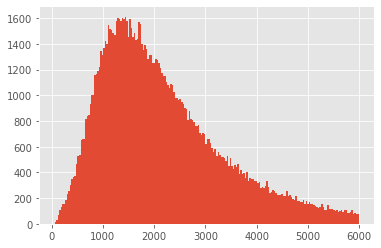

In [6]:
data.lemmatized_review.str.len().hist(bins=200)

Отличаются ли рецензии разной тональности длиной?

<AxesSubplot:>

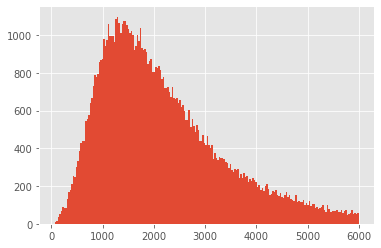

In [7]:
pos_data=data[data["type"]==1]
pos_data.lemmatized_review.str.len().hist(bins=200)

<AxesSubplot:>

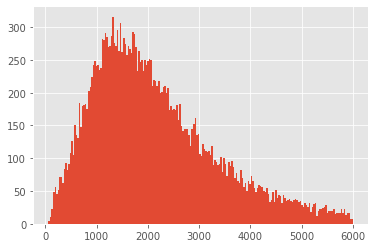

In [8]:
neu_data=data[data["type"]==0]
neu_data.lemmatized_review.str.len().hist(bins=200)

<AxesSubplot:>

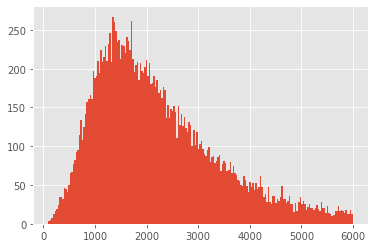

In [9]:
neg_data=data[data["type"]==-1]
neg_data.lemmatized_review.str.len().hist(bins=200)

Посмотрим на самые частые слова/сочетания слов.

In [10]:
list_of_words[0][:-1]

['это',
 'мой',
 'мнение',
 'и',
 'я',
 'без',
 'разница',
 'сколько',
 'быть',
 'минус',
 'я',
 'мочь',
 'сказать',
 'только',
 'один',
 'вкратце',
 'ассбендер',
 'как',
 'холл',
 'увы',
 'не',
 'то',
 'пальто',
 'на',
 'уровень',
 'как',
 'и',
 'джессика',
 'альба',
 'из',
 'город',
 'грех',
 '2',
 'часть',
 'книжный',
 'холл',
 'иметь',
 'более',
 'глубокий',
 'характер',
 'и',
 'прилично',
 'скелет',
 'в',
 'шкаф',
 'в',
 'отличие',
 'от',
 'экранизировать',
 'снеговик',
 'видно',
 'получиться',
 'обрезать',
 'и',
 'недоделать',
 'но',
 'всё',
 'таки',
 'за',
 'смелый',
 'попытка',
 'так',
 'экранизировать',
 'не',
 'сам',
 'хороший',
 'режиссёр',
 'респект',
 'однозначно',
 'как',
 'всегда',
 'продюсер',
 'и',
 'студийный',
 'босс',
 'напарашили',
 'а',
 'мочь',
 'бы',
 'получиться',
 'один',
 'из',
 'потрясать',
 'и',
 'атмосферный',
 'детективный',
 'драма',
 'последний',
 'год',
 '5',
 'но',
 'увы',
 'не',
 'судьба',
 'у',
 'книга',
 'как',
 'и',
 'у',
 'фильм',
 'сюжет',
 'оче

In [11]:
reviews=list_of_words
#occurence = Counter()
occurence = {}
for review in reviews:
    for token in review[:-1]:
        if token in occurence:
            if review[-1] == -1:
                occurence[token][0][0] += 1
            if review[-1] == 0:
                occurence[token][0][1] += 1
            if review[-1] == 1:
                occurence[token][0][2] += 1
            occurence[token][1].add(review[-1])
        else:
            occurence[token] = list([[0, 0, 0], set()])
        

In [12]:
len(occurence)

323050

In [13]:
bad_tokens = []
for k in occurence:
    if occurence[k][0][0] > 20000 and occurence[k][0][1] > 20000 and occurence[k][0][2] > 20000 and len(occurence[k][1]) == 3:
        bad_tokens.append(k)

In [14]:
len(bad_tokens)

35

In [15]:
bad_tokens

['это',
 'и',
 'я',
 'быть',
 'один',
 'как',
 'не',
 'то',
 'на',
 'из',
 'в',
 'от',
 'но',
 'всё',
 'за',
 'так',
 'а',
 'бы',
 'у',
 'фильм',
 'свой',
 'он',
 'что',
 'она',
 'же',
 'к',
 'они',
 'тот',
 'который',
 'с',
 'этот',
 'такой',
 'по',
 'весь',
 'о']

собсна сама модель

In [16]:
import gensim

In [17]:
word2vec = gensim.models.Word2Vec(window=2,
                     min_count=0,
                     size=500,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

In [18]:
new_list_of_words=[sent[:-1] for sent in list_of_words]
    

In [19]:
new_list_of_words

[['это',
  'мой',
  'мнение',
  'и',
  'я',
  'без',
  'разница',
  'сколько',
  'быть',
  'минус',
  'я',
  'мочь',
  'сказать',
  'только',
  'один',
  'вкратце',
  'ассбендер',
  'как',
  'холл',
  'увы',
  'не',
  'то',
  'пальто',
  'на',
  'уровень',
  'как',
  'и',
  'джессика',
  'альба',
  'из',
  'город',
  'грех',
  '2',
  'часть',
  'книжный',
  'холл',
  'иметь',
  'более',
  'глубокий',
  'характер',
  'и',
  'прилично',
  'скелет',
  'в',
  'шкаф',
  'в',
  'отличие',
  'от',
  'экранизировать',
  'снеговик',
  'видно',
  'получиться',
  'обрезать',
  'и',
  'недоделать',
  'но',
  'всё',
  'таки',
  'за',
  'смелый',
  'попытка',
  'так',
  'экранизировать',
  'не',
  'сам',
  'хороший',
  'режиссёр',
  'респект',
  'однозначно',
  'как',
  'всегда',
  'продюсер',
  'и',
  'студийный',
  'босс',
  'напарашили',
  'а',
  'мочь',
  'бы',
  'получиться',
  'один',
  'из',
  'потрясать',
  'и',
  'атмосферный',
  'детективный',
  'драма',
  'последний',
  'год',
  '5',
  'н

In [20]:
word2vec.build_vocab(new_list_of_words)

In [21]:
word2vec.train(new_list_of_words, total_examples=word2vec.corpus_count, epochs=5)

(101394015, 204289265)

In [22]:
word2vec.init_sims(replace=True)

In [23]:
data_vector = []
for i in range(len(new_list_of_words)):
     data_vector.append(np.mean(word2vec[new_list_of_words[i]], axis=0))

<ipython-input-23-76ef94529579>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  data_vector.append(np.mean(word2vec[new_list_of_words[i]], axis=0))


In [24]:
x_w2v=np.array(data_vector)

In [25]:
x_w2v.shape

(128292, 500)

In [26]:
#stop_words = set(nltk.corpus.stopwords.words('russian'))
bad_tokens=set(bad_tokens)
#stopword_set = bad_tokens.union(stop_words)

SEED=43
#len(stopword_set)

In [27]:
#pipe = Pipeline([
#    (
#        'vectorizer',
#        TfidfVectorizer(
#            lowercase=True, ngram_range=(1,3), analyzer='word', token_pattern="[а-яё1-9/]+",norm='l2',
#            stop_words=bad_tokens, min_df=10, max_df=0.8
#        )
#    ),
#    ('clf', SGDClassifier(random_state=SEED, loss='modified_huber', class_weight='balanced'))
#])
#так вроде лучший результат

In [28]:
#x=data["lemmatized_review"].values
y=data["type"].values

In [29]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)
x_train, x_test, y_train, y_test = train_test_split(x_w2v, y, test_size=0.3, random_state=SEED)

In [58]:
#pipe.fit(x_train, y_train)

In [30]:
model=SGDClassifier(random_state=SEED, loss='modified_huber', class_weight='balanced')

In [31]:
model.fit(x_train,y_train)

SGDClassifier(class_weight='balanced', loss='modified_huber', random_state=43)

In [32]:
test_predictions=model.predict(x_test)

In [33]:
#test_predictions = pipe.predict(x_test)

### Посмотрим на confusion_matrix

In [34]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_true=y_test, y_pred=test_predictions)
m

array([[ 4414,   223,  1130],
       [ 2348,   844,  4054],
       [ 1745,   675, 23055]], dtype=int64)

### Специальная метрика

In [35]:
def special_metric(y_test,test_predictions):
    mse=mean_squared_error(y_test,test_predictions)
    return 1-0.25*mse
    

In [36]:
special_metric(y_test, test_predictions)

0.8778840157971316

### balanced_accuracy_score

In [37]:
balanced_accuracy_score(test_predictions,y_test)

0.6065971613180282

### accuracy_score

In [38]:
accuracy_score(y_test, test_predictions)

0.7356318852629391

# Специальная точность

In [39]:
a1=m[0][0]
a2=m[0][1]
a3=m[0][2]
b1=m[1][0]
b2=m[1][1]
b3=m[1][2]
c1=m[2][0]
c2=m[2][1]
c3=m[2][2]

In [40]:
(a1+b2+c3)/(a1+b2+c3+a2+b1+b3+c2+2*c1+2*a3)

0.6845006406691971

In [41]:
def our_precision(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+a3+b3), b2/(a2+c2+b2), a1/(a1+b1+c1)]

In [42]:
print("Precision для положительных отзывов: ", our_precision(m)[0])
print("Precision для нейтральных отзывов: ", our_precision(m)[1])
print("Precision для отрицательных отзывов: ", our_precision(m)[2])


Precision для положительных отзывов:  0.8164240943376182
Precision для нейтральных отзывов:  0.4845005740528129
Precision для отрицательных отзывов:  0.5188668155636534


In [43]:
def our_recall(m):
    a1, a2, a3, b1, b2, b3, c1, c2, c3 = m[0][0], m[0][1], m[0][2], m[1][0], m[1][1], m[1][2], m[2][0], m[2][1], m[2][2]
    error = 0
    return [c3/(c3+c2+c1), b2/(b1+b2+b3),a1/(a1+a2+a3)]


In [44]:
 
print("Recall для положительных отзывов: ", our_recall(m)[0])
print("Recall для нейтральных отзывов: ", our_recall(m)[1])
print("Recall для отрицательных отзывов: ", our_recall(m)[2])

Recall для положительных отзывов:  0.9050049067713445
Recall для нейтральных отзывов:  0.11647805685895667
Recall для отрицательных отзывов:  0.7653892838564245


In [45]:
def our_f1(pr,rec):
    return 2*pr*rec/(pr+rec)

In [46]:
print("F1-score для положительных отзывов: ", our_f1(our_precision(m)[0],our_recall(m)[0]))
print("F1-score для нейтральных отзывов: ", our_f1(our_precision(m)[1],our_recall(m)[1]))
print("F1-score для отрицательных отзывов: ", our_f1(our_precision(m)[2],our_recall(m)[2]))

F1-score для положительных отзывов:  0.858435417209666
F1-score для нейтральных отзывов:  0.1878059635068981
F1-score для отрицательных отзывов:  0.618467143057307
